In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [6]:
df.shape

(768, 9)

In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


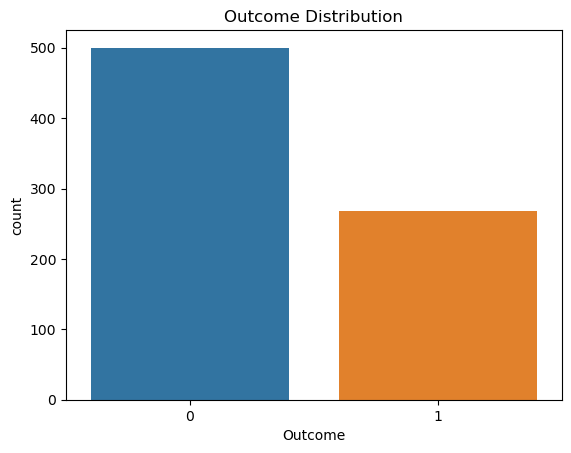

In [9]:
sns.countplot(x='Outcome',data=df)
plt.title("Outcome Distribution")
plt.show()

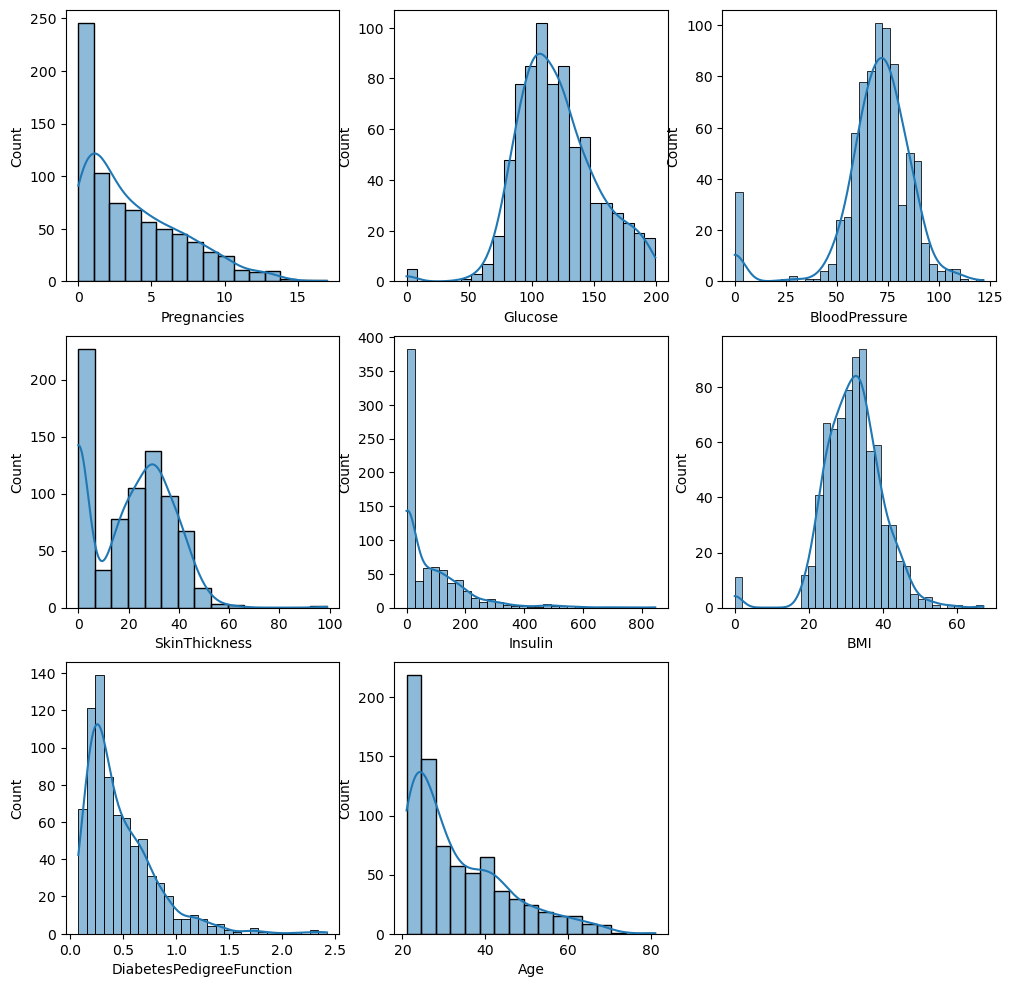

In [10]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
  plt.subplot(3,3,i+1)
  sns.histplot(x=col,data=df,kde=True)
plt.show()

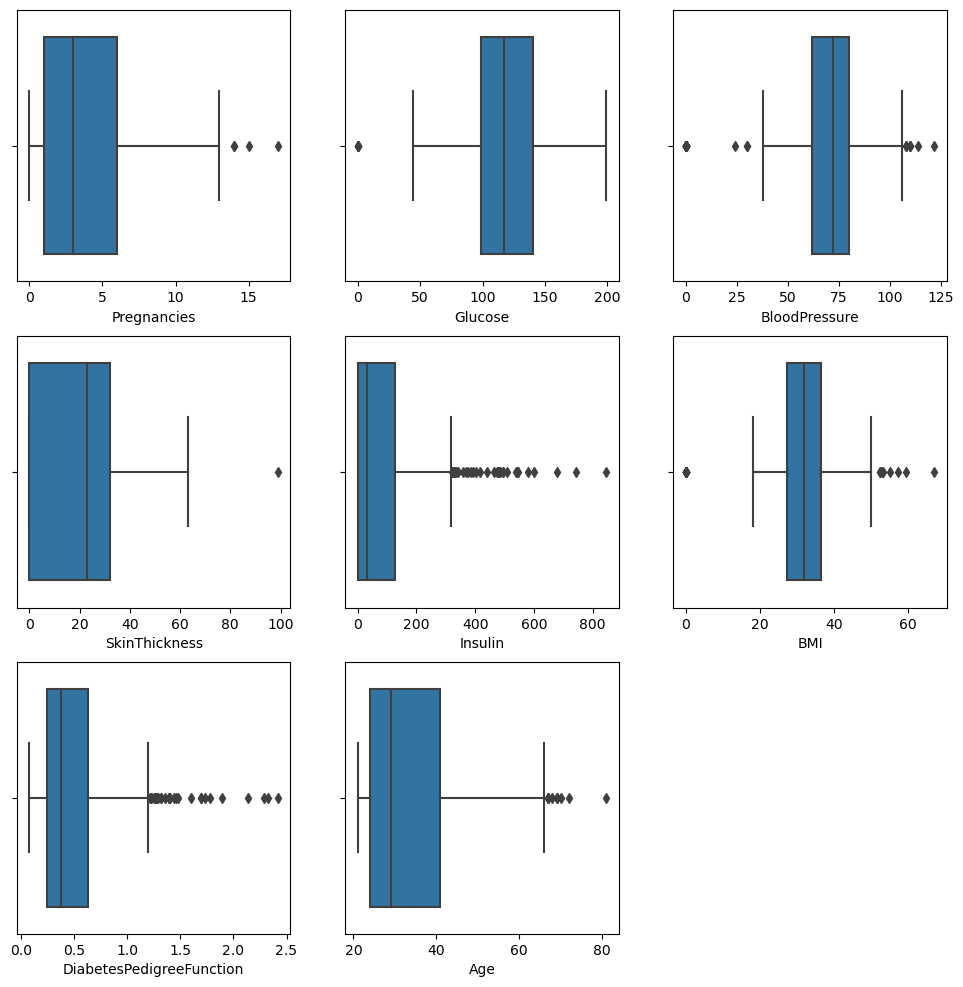

In [11]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Pregnancies','Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction','Age']):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=col,data=df)
plt.show()

c:\Users\avina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


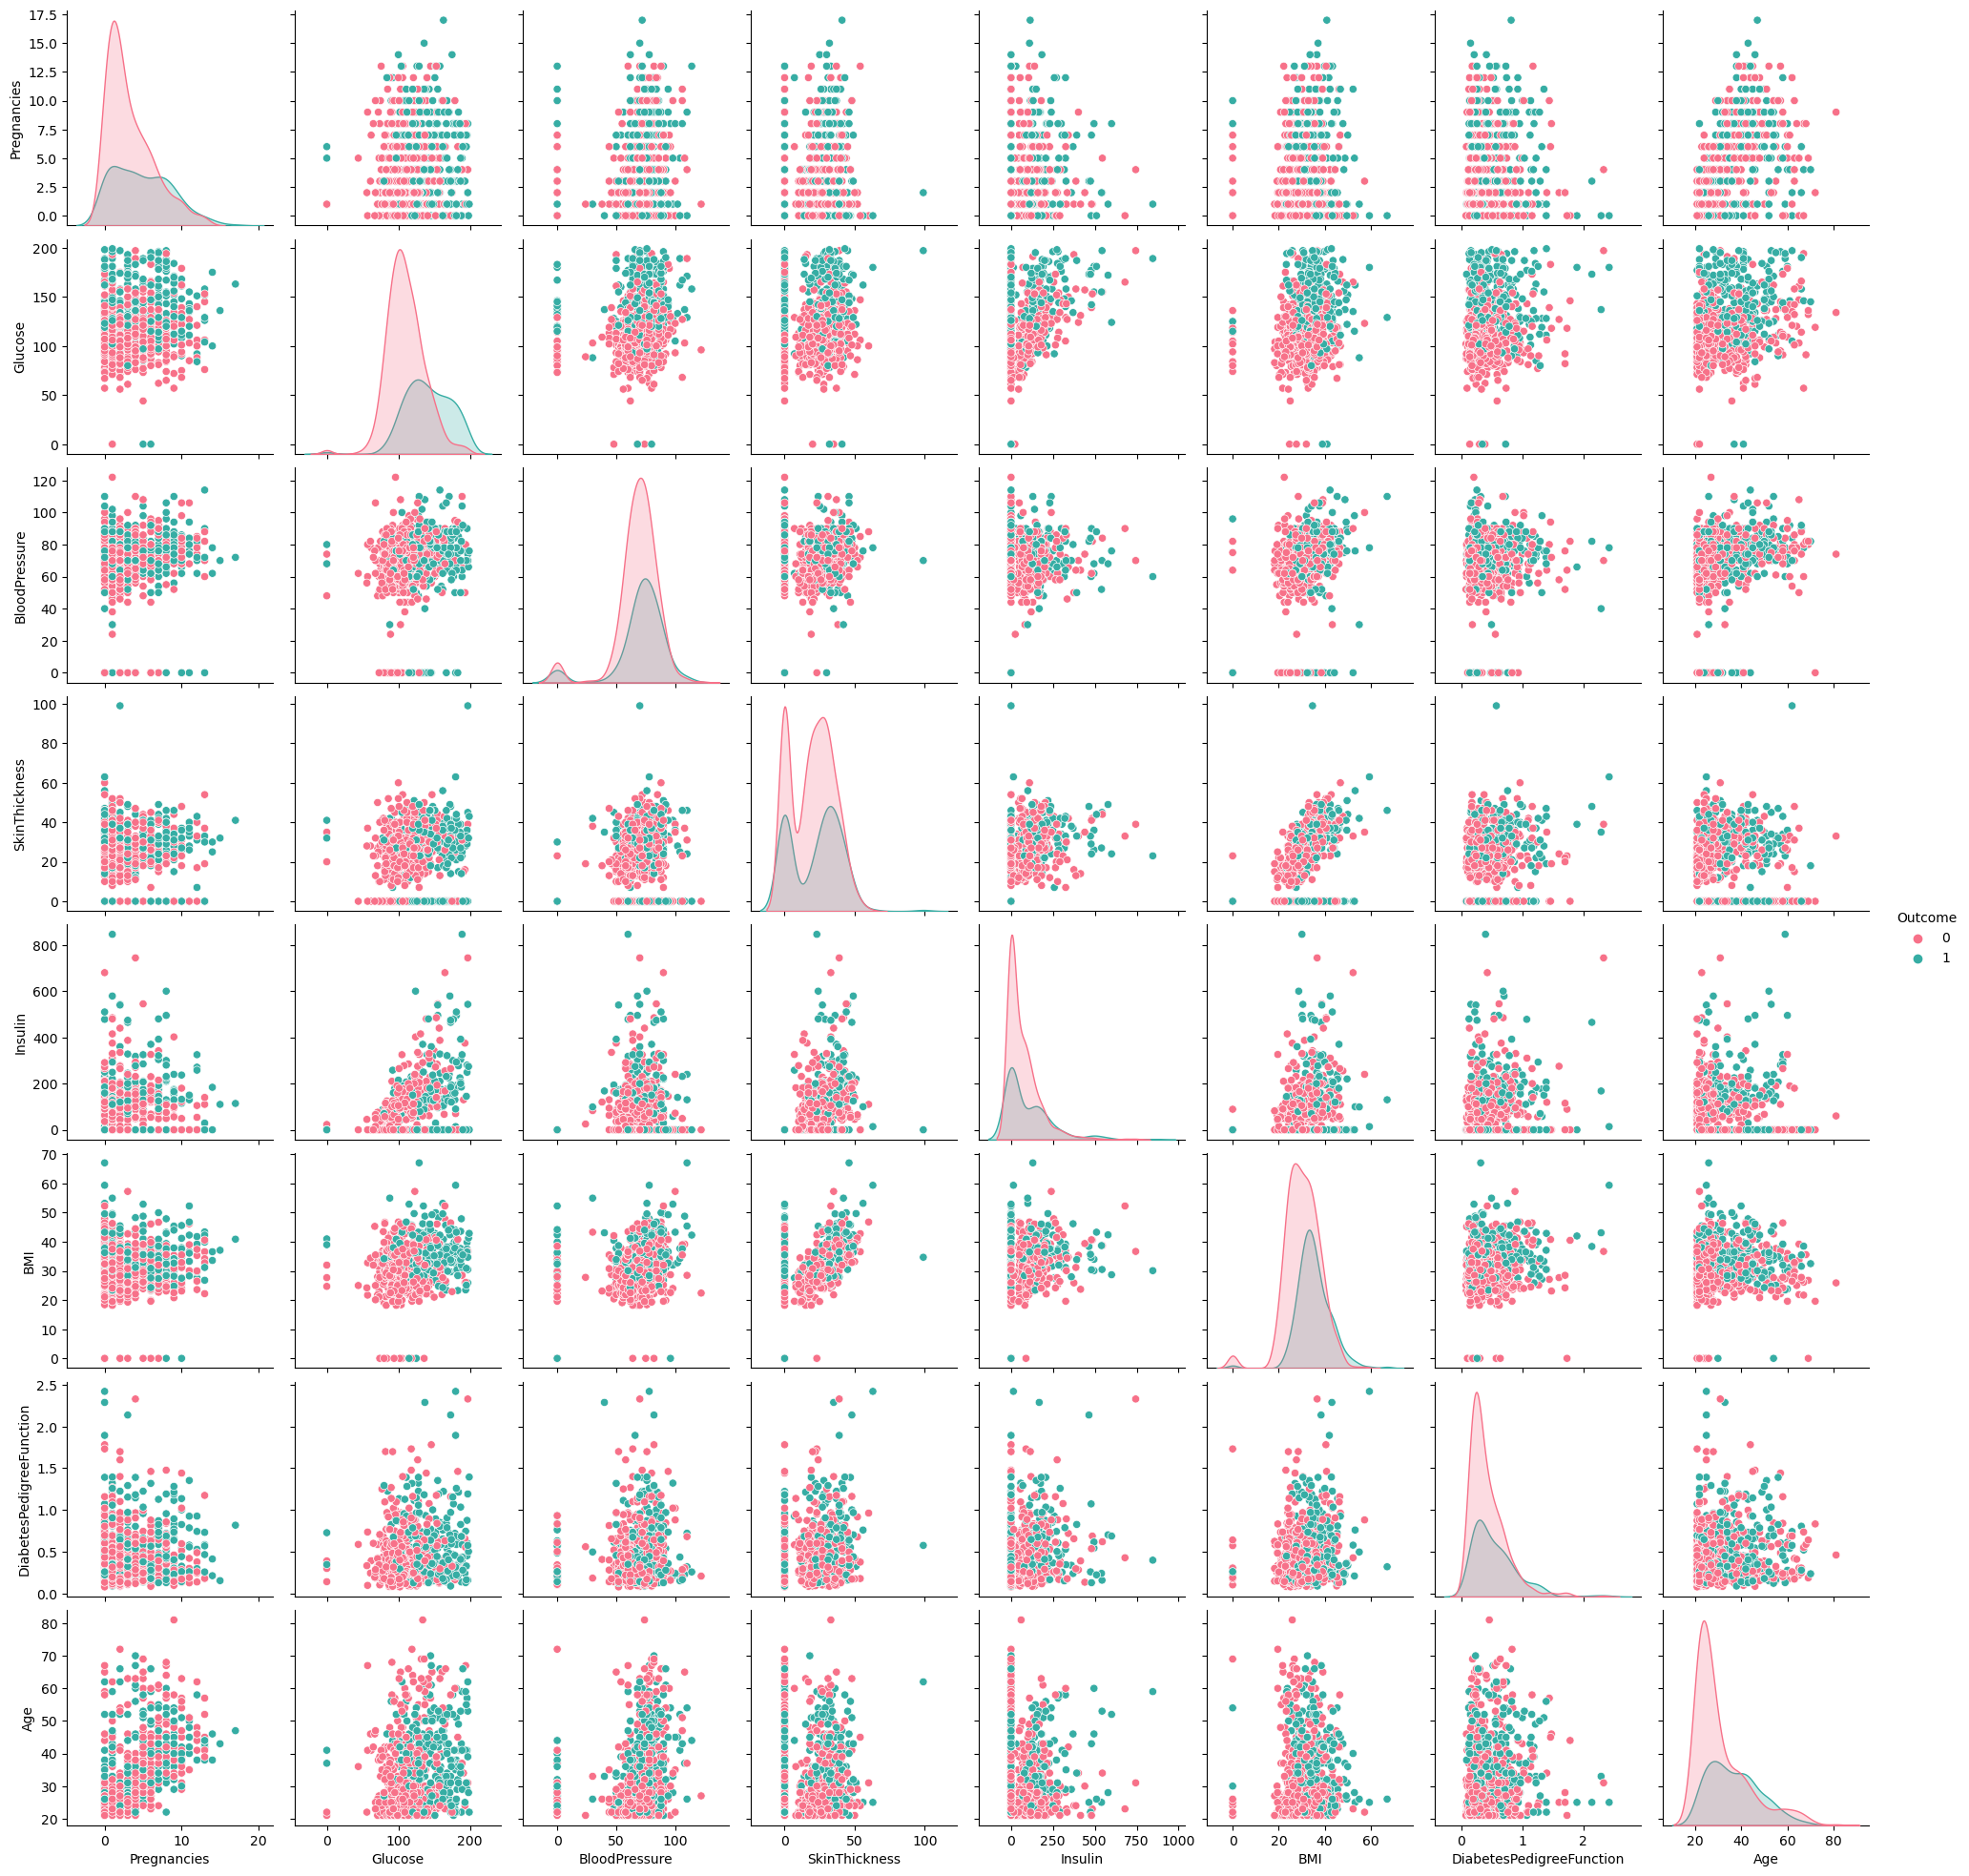

In [12]:
sns.pairplot(df,hue='Outcome', palette='husl')
plt.show()

In [13]:
df.isnull().values.any()

False

In [14]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
from scipy import stats
attributes_with_outliers = ['SkinThickness', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure', 'Glucose']


def remove_outliers_zscore(df, attributes):
    for attr in attributes:
        z_scores = stats.zscore(df[attr])
        df = df[(z_scores < 3) & (z_scores > -3)]
    return df

data= remove_outliers_zscore(df, attributes_with_outliers)

In [16]:
df.shape,data.shape

((768, 9), (690, 9))

In [17]:
correlation_matrix =data.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.163658,0.217502,-0.075431,-0.068866,0.057832,0.000518,0.564932,0.248099
Glucose,0.163658,1.000000,0.231969,0.018488,0.273234,0.196347,0.091671,0.265158,0.484837
BloodPressure,0.217502,0.231969,1.000000,0.009006,-0.066151,0.272438,0.022083,0.350878,0.183155
SkinThickness,-0.075431,0.018488,0.009006,1.000000,0.460611,0.388714,0.170656,-0.140115,0.059597
Insulin,-0.068866,0.273234,-0.066151,0.460611,1.000000,0.168095,0.195227,-0.074497,0.110423
BMI,0.057832,0.196347,0.272438,0.388714,0.168095,1.000000,0.125762,0.064897,0.302966
DiabetesPedigreeFunction,0.000518,0.091671,0.022083,0.170656,0.195227,0.125762,1.000000,0.045669,0.221823
Age,0.564932,0.265158,0.350878,-0.140115,-0.074497,0.064897,0.045669,1.000000,0.256041
Outcome,0.248099,0.484837,0.183155,0.059597,0.110423,0.302966,0.221823,0.256041,1.000000


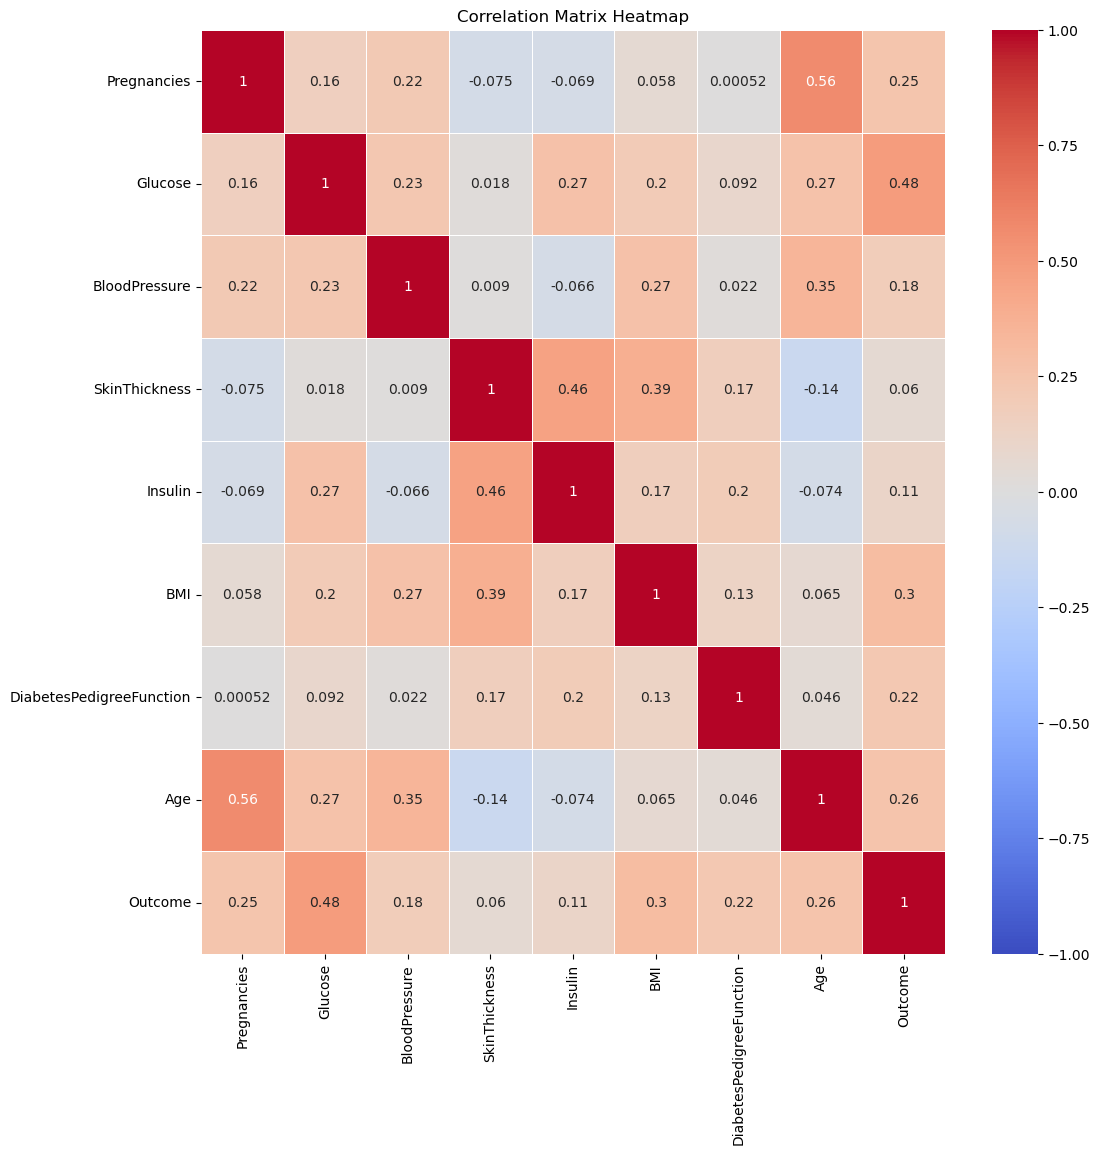

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=.5,vmin=-1.0,center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

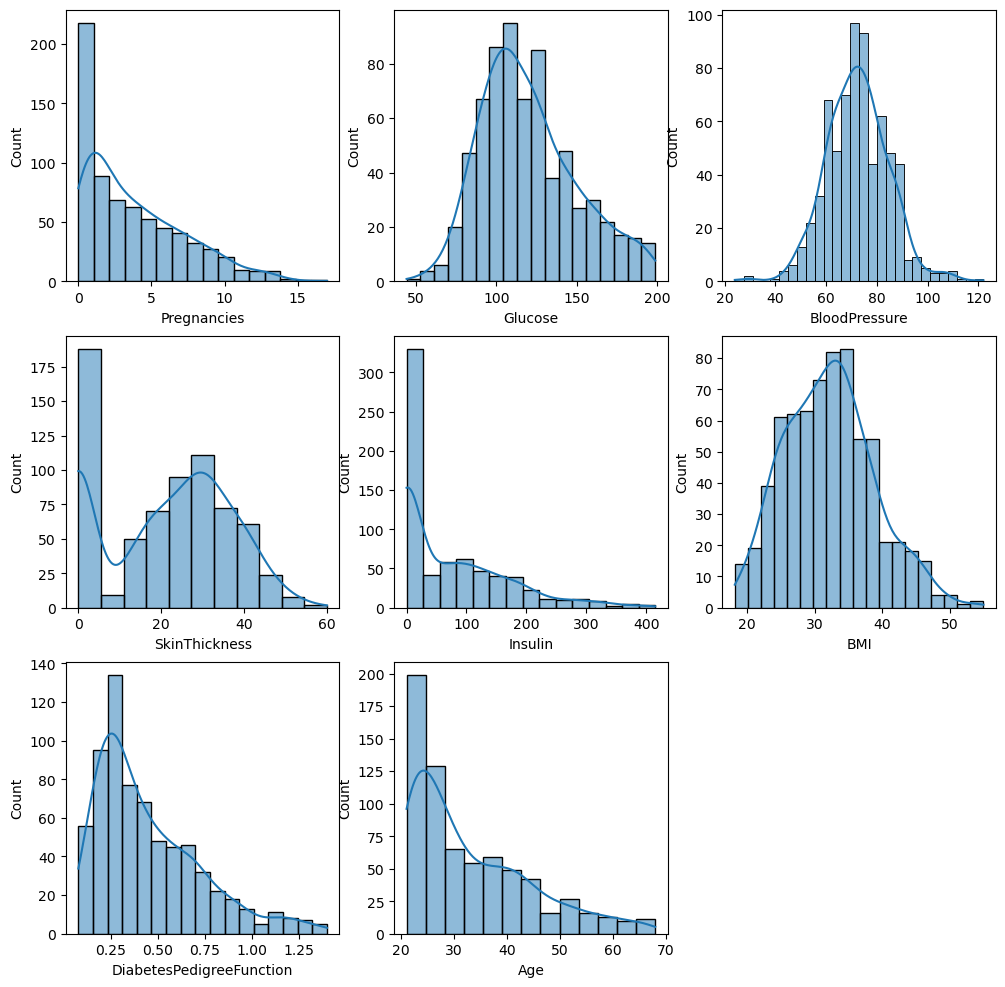

In [19]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
  plt.subplot(3,3,i+1)
  sns.histplot(x=col,data=data,kde=True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (483, 8)
Shape of X_test: (207, 8)
Shape of y_train: (483,)
Shape of y_test: (207,)


In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [22]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 690, dtype: int64

Sensitivity: 0.5797101449275363
Specificity: 0.8260869565217391
Accuracy: 0.7439613526570048
F1 Score: 0.6015037593984962
Precision: 0.625
Negative Predicted Rate: 0.7972027972027972
False Negative Rate: 0.42028985507246375
False Positive Rate: 0.17391304347826086
False Discovery Rate: 0.375
False Omission Rate: 0.20279720279720279


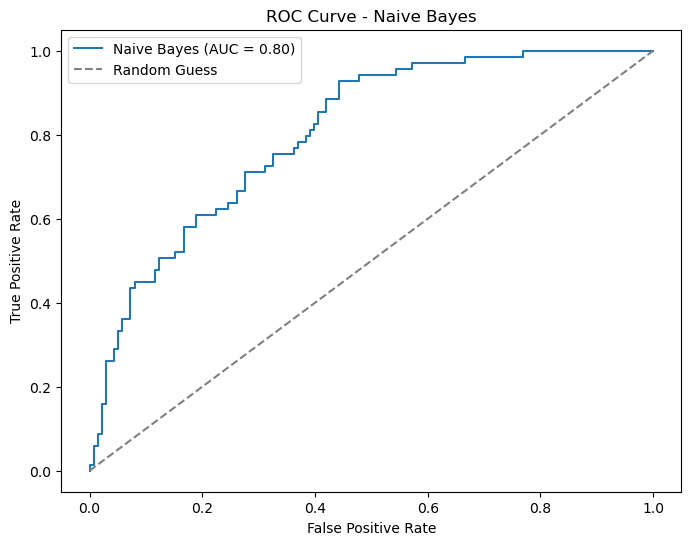

Cross-validated AUC scores: [0.79014423 0.75568182 0.75520833 0.7109375  0.6953125 ]
Mean AUC score: 0.7414568764568765
       Classifier           Data  train_Accuracy  test_accuracy  \
0  Naive Bayes CV  without smote       77.846791      74.396135   

   cross_val_mean  AUC Score  Sensitivity  Specificity  F1 Score  Precision  \
0       74.145688   0.803928      0.57971     0.826087  0.601504      0.625   

   Negative Predictive Value  False Negative Rate  False Positive Rate  \
0                   0.797203              0.42029             0.173913   

   False Discovery Rate  False Omission Rate  
0                 0.375             0.202797  


In [23]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
results_list = []

def append_results(data, classifier, train_accuracy, test_accuracy,cv_auc_scores, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy,'cross_val_mean':cv_auc_scores, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

nb_train_predictions = naive_bayes_model.predict(X_train)
nb_test_predictions = naive_bayes_model.predict(X_test)

nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
nb_test_conf_matrix = confusion_matrix(y_test, nb_test_predictions)
nb_test_probabilities = naive_bayes_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, nb_test_probabilities)

tn, fp, fn, tp = nb_test_conf_matrix.ravel()
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

fpr, tpr, thresholds = roc_curve(y_test, nb_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring=make_scorer(roc_auc_score))
print("Cross-validated AUC scores:", cv_auc_scores)
print("Mean AUC score:", cv_auc_scores.mean())
append_results('without smote', 'Naive Bayes CV', nb_train_accuracy * 100, nb_test_accuracy * 100, cv_auc_scores.mean() * 100, auc_score,
               tp / (tp + fn), tn / (tn + fp),
               (2 * tp) / (2 * tp + fp + fn), tp / (tp + fp),
               tn / (tn + fn), fn / (fn + tp),
               fp / (fp + tn), fp / (fp + tp),
               fn / (fn + tn))
results_df = pd.DataFrame(results_list)
print(results_df)

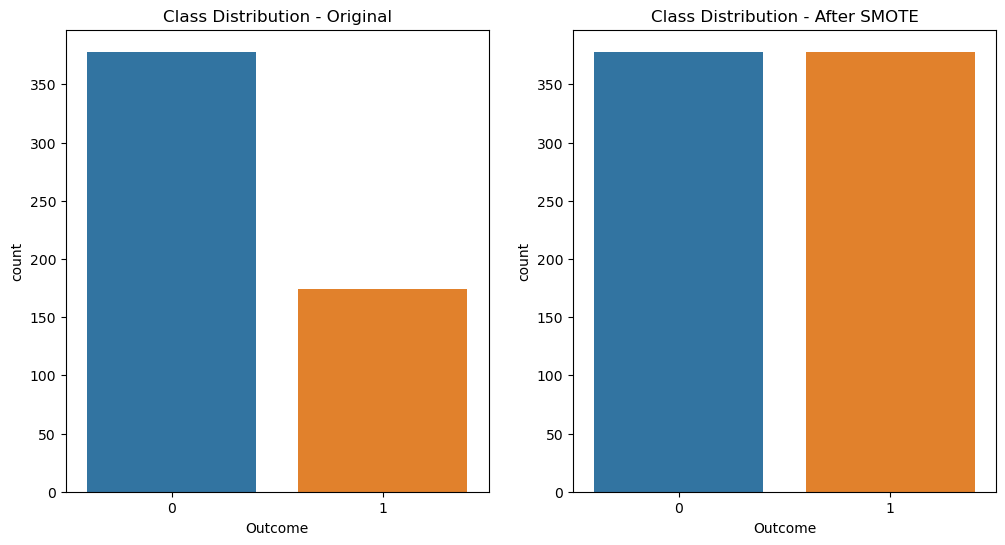


Naive Bayes Metrics on Test Set:
Sensitivity: 0.6491228070175439
Specificity: 0.7901234567901234
Accuracy: 0.7318840579710145
F1 Score: 0.6666666666666666
Precision: 0.6851851851851852
Negative Predicted Rate: 0.7619047619047619
False Negative Rate: 0.3508771929824561
False Positive Rate: 0.20987654320987653
False Discovery Rate: 0.3148148148148148
False Omission Rate: 0.23809523809523808


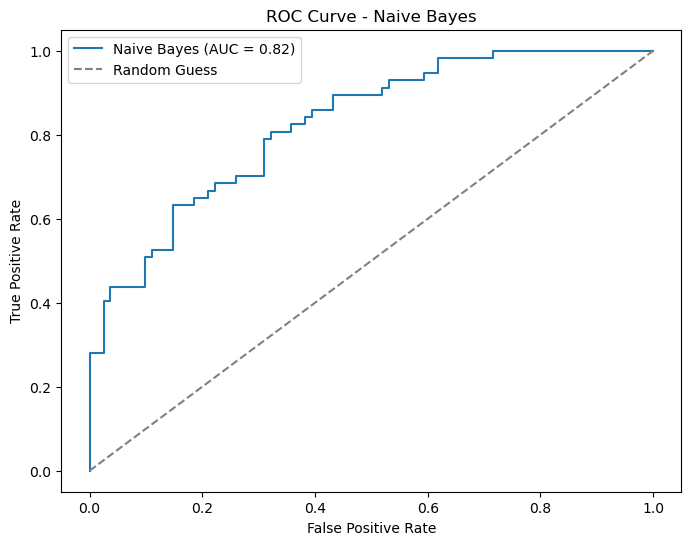


Cross-validated AUC scores: [0.81578947 0.78096491 0.69552632 0.78815789 0.71526316]
Mean AUC score: 0.7591403508771929


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


def append_results(data, classifier, train_accuracy, test_accuracy, cv_auc_scores, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy, 'cross_val_mean': cv_auc_scores, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution - Original')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution - After SMOTE')

plt.show()


naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_resampled, y_resampled)

nb_train_predictions = naive_bayes_model.predict(X_resampled)
nb_train_accuracy = accuracy_score(y_resampled, nb_train_predictions)


nb_test_predictions = naive_bayes_model.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
nb_test_conf_matrix = confusion_matrix(y_test, nb_test_predictions)
nb_test_probabilities = naive_bayes_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, nb_test_probabilities)

tn, fp, fn, tp = nb_test_conf_matrix.ravel()
print('\nNaive Bayes Metrics on Test Set:')
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))


fpr, tpr, thresholds = roc_curve(y_test, nb_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring=make_scorer(roc_auc_score))
print("\nCross-validated AUC scores:", cv_auc_scores)
print("Mean AUC score:", cv_auc_scores.mean())

append_results('withsmote', 'Naive Bayes CV', nb_train_accuracy * 100, nb_test_accuracy * 100, cv_auc_scores.mean() * 100, auc_score,
               tp / (tp + fn), tn / (tn + fp),
               (2 * tp) / (2 * tp + fp + fn), tp / (tp + fp),
               tn / (tn + fn), fn / (fn + tp),
               fp / (fp + tn), fp / (fp + tp),
               fn / (fn + tn))


results_df = pd.DataFrame(results_list)



Random Forest Training Accuracy: 100.0
Confusion Matrix for Random Forest on Training Set:
[[378   0]
 [  0 174]]

Random Forest Test Accuracy: 73.18840579710145
Confusion Matrix for Random Forest on Test Set:
[[73  8]
 [29 28]]

Random Forest Metrics on Test Set:
Sensitivity: 0.49122807017543857
Specificity: 0.9012345679012346
Accuracy: 0.7318840579710145
F1 Score: 0.6021505376344086
Precision: 0.7777777777777778
Negative Predicted Rate: 0.7156862745098039
False Negative Rate: 0.5087719298245614
False Positive Rate: 0.09876543209876543
False Discovery Rate: 0.2222222222222222
False Omission Rate: 0.28431372549019607


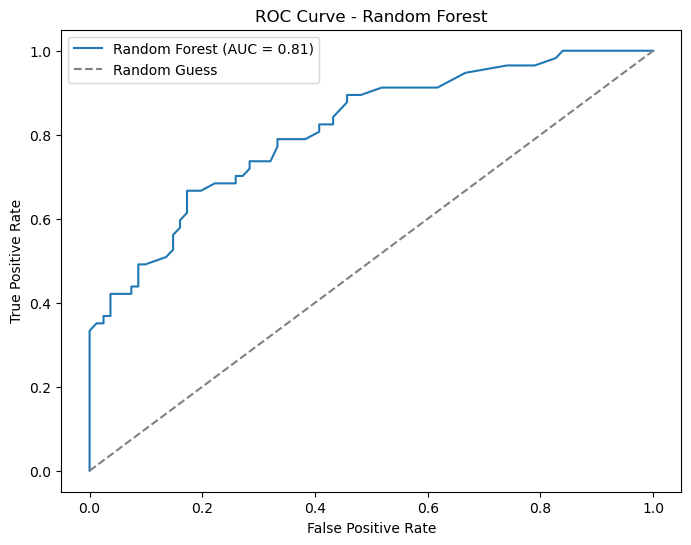


Cross-validated AUC scores: [0.91049383 0.77000721 0.83863556 0.80400163 0.81366099]
Mean AUC score: 0.8273598442532544


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

def append_results(data, classifier, train_accuracy, test_accuracy, cv_auc_score, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy, 'cross_val_mean': cv_auc_score, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})

random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)

rf_train_predictions = random_forest_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_conf_matrix = confusion_matrix(y_train, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy*100)
print("Confusion Matrix for Random Forest on Training Set:")
print(rf_train_conf_matrix)

rf_test_predictions = random_forest_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_predictions)
print("\nRandom Forest Test Accuracy:", rf_test_accuracy*100)
print("Confusion Matrix for Random Forest on Test Set:")
print(rf_test_conf_matrix)

rf_test_probabilities = random_forest_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, rf_test_probabilities)
tn, fp, fn, tp = rf_test_conf_matrix.ravel()

print('\nRandom Forest Metrics on Test Set:')
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

fpr, tpr, thresholds = roc_curve(y_test, rf_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='roc_auc')


print("\nCross-validated AUC scores:", cv_auc_scores)
print("Mean AUC score:", cv_auc_scores.mean())

append_results('without smote', 'Random Forest CV', rf_train_accuracy*100, rf_test_accuracy*100, cv_auc_scores.mean() * 100, auc_score,
               tp / (tp + fn), tn / (tn + fp),
               (2 * tp) / (2 * tp + fp + fn), tp / (tp + fp),
               tn / (tn + fn), fn / (fn + tp),
               fp / (fp + tn), fp / (fp + tp),
               fn / (fn + tn))
results_df = pd.DataFrame(results_list)



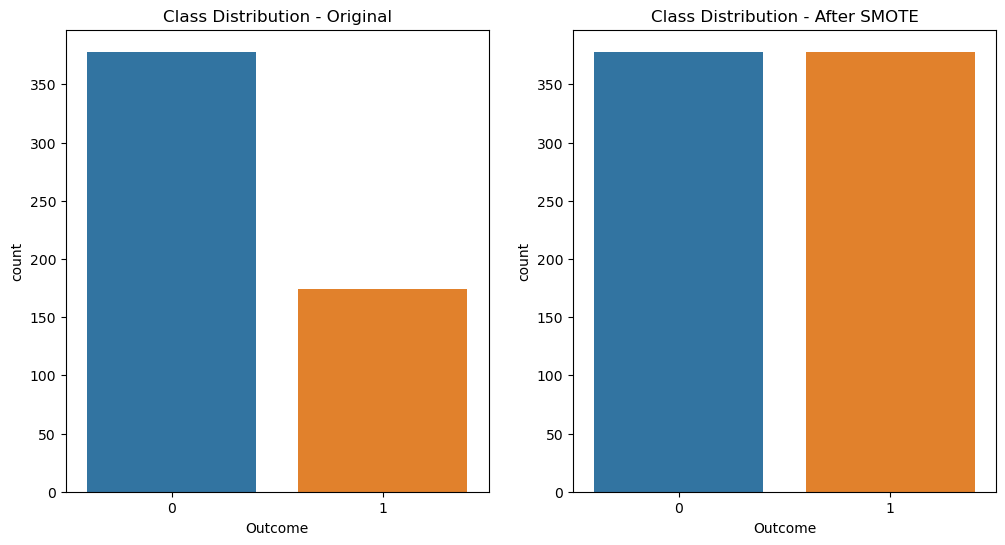

Random Forest Training Accuracy: 100.0
Confusion Matrix for Random Forest on Training Set:
[[378   0]
 [  0 378]]

Random Forest Test Accuracy: 74.63768115942028
Confusion Matrix for Random Forest on Test Set:
[[64 17]
 [18 39]]

Random Forest Metrics on Test Set:
Sensitivity: 0.6842105263157895
Specificity: 0.7901234567901234
Accuracy: 0.7463768115942029
F1 Score: 0.6902654867256637
Precision: 0.6964285714285714
Negative Predicted Rate: 0.7804878048780488
False Negative Rate: 0.3157894736842105
False Positive Rate: 0.20987654320987653
False Discovery Rate: 0.30357142857142855
False Omission Rate: 0.21951219512195122


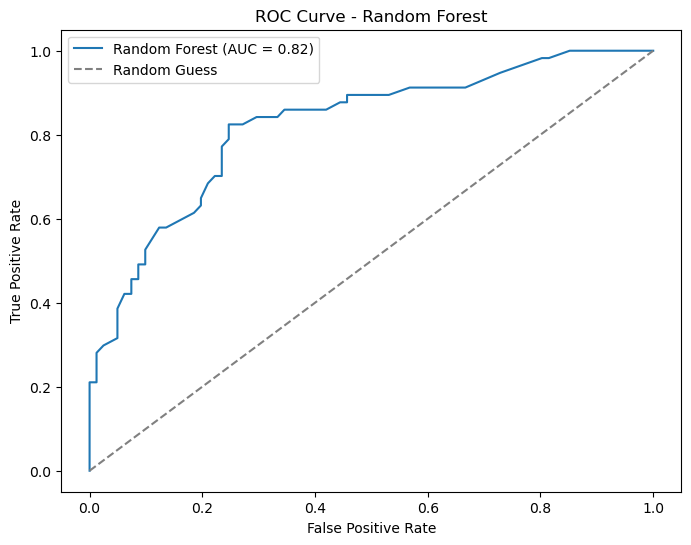


Cross-validated AUC scores: [0.86184211 0.85430464 0.81456954 0.8807947  0.80794702]
Mean AUC score: 0.8438915998605786


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

def append_results(data, classifier, train_accuracy, test_accuracy, cv_auc_score, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy, 'cross_val_mean': cv_auc_score, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution - Original')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution - After SMOTE')
plt.show()

random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_resampled, y_resampled)
rf_train_predictions = random_forest_model.predict(X_resampled)
rf_train_accuracy = accuracy_score(y_resampled, rf_train_predictions)
rf_train_conf_matrix = confusion_matrix(y_resampled, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy*100)
print("Confusion Matrix for Random Forest on Training Set:")
print(rf_train_conf_matrix)

rf_test_predictions = random_forest_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_predictions)
print("\nRandom Forest Test Accuracy:", rf_test_accuracy*100)
print("Confusion Matrix for Random Forest on Test Set:")
print(rf_test_conf_matrix)

rf_test_probabilities = random_forest_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, rf_test_probabilities)
tn, fp, fn, tp = rf_test_conf_matrix.ravel()
print('\nRandom Forest Metrics on Test Set:')
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

fpr, tpr, thresholds = roc_curve(y_test, rf_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
cv= cross_val_score(random_forest_model, X_resampled, y_resampled, cv=kfold, scoring='precision')
print("\nCross-validated AUC scores:", cv_auc_scores)
print("Mean AUC score:", cv_auc_scores.mean())


append_results('with_smote', 'Random Forest CV', rf_train_accuracy*100, rf_test_accuracy*100, cv_auc_scores.mean() * 100, auc_score,
               tp / (tp + fn), tn / (tn + fp),
               (2 * tp) / (2 * tp + fp + fn), tp / (tp + fp),
               tn / (tn + fn), fn / (fn + tp),
               fp / (fp + tn), fp / (fp + tp),
               fn / (fn + tn))

results_df = pd.DataFrame(results_list)


In [27]:
print("Results of Algorithms")
print(results_df)

Results of Algorithms
         Classifier           Data  train_Accuracy  test_accuracy  \
0    Naive Bayes CV  without smote       77.846791      74.396135   
1    Naive Bayes CV      withsmote       75.925926      73.188406   
2  Random Forest CV  without smote      100.000000      73.188406   
3  Random Forest CV     with_smote      100.000000      74.637681   

   cross_val_mean  AUC Score  Sensitivity  Specificity  F1 Score  Precision  \
0       74.145688   0.803928     0.579710     0.826087  0.601504   0.625000   
1       75.914035   0.824995     0.649123     0.790123  0.666667   0.685185   
2       82.735984   0.811241     0.491228     0.901235  0.602151   0.777778   
3       84.389160   0.822937     0.684211     0.790123  0.690265   0.696429   

   Negative Predictive Value  False Negative Rate  False Positive Rate  \
0                   0.797203             0.420290             0.173913   
1                   0.761905             0.350877             0.209877   
2             

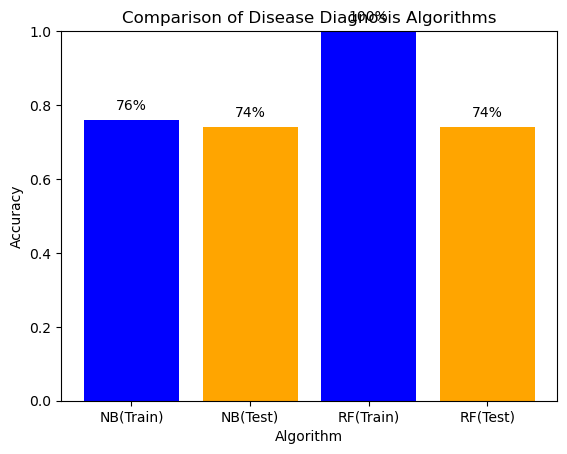

In [28]:
import matplotlib.pyplot as plt
import numpy as np
rf_accuracy_train = 1.0
rf_accuracy_test = 0.74
nb_accuracy_train = 0.76
nb_accuracy_test = 0.74
algorithms = ['NB(Train)', 'NB(Test)','RF(Train)', 'RF(Test)']
accuracies = [nb_accuracy_train, nb_accuracy_test,rf_accuracy_train, rf_accuracy_test]
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Disease Diagnosis Algorithms')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{int(v*100)}%', ha='center', va='bottom')
plt.show()

In [29]:
# Assuming you have a trained model named 'your_model'
import pickle

# Train your model (replace this with your actual training process)
rf_model =random_forest_model

# Save the trained model using pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model,model_file)
